In [0]:
# Część 1

In [3]:
from sklearn import datasets

# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Zobaczmy jakie dane mamy w zbiorze
print('Elementy zbioru: ', list(iris.keys()))

# Zobaczmy jak wyglądają elementy zbioru
print('Typ pierwszego elementu z \'data\': ', type(iris['data'][0]))
print('Kilka pierwszych elementów:')
print(iris['data'][0:5])

# Kwiaty mają swoje etykiety numeryczne...
print('Pierwszy kwiat w zbiorze to: ', iris['target'][0])

# ... a odpowiadające im nazwy są osobno
print('Pierwszy kwiat w zbiorze (słownie) to: ', iris['target_names'][0])

# Etykiety które występują
print('Cechy irysów w zbiorze to: ', iris['feature_names'])

Elementy zbioru:  ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
Typ pierwszego elementu z 'data':  <class 'numpy.ndarray'>
Kilka pierwszych elementów:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Pierwszy kwiat w zbiorze to:  0
Pierwszy kwiat w zbiorze (słownie) to:  setosa
Cechy irysów w zbiorze to:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [0]:
# Zadanie 1: sprawdź poniżej inne elementy wczytanego zbioru danych, w szczególności opis.
# Opisz w max 3 zdaniach swoimi słowami co zawiera zbiór danych


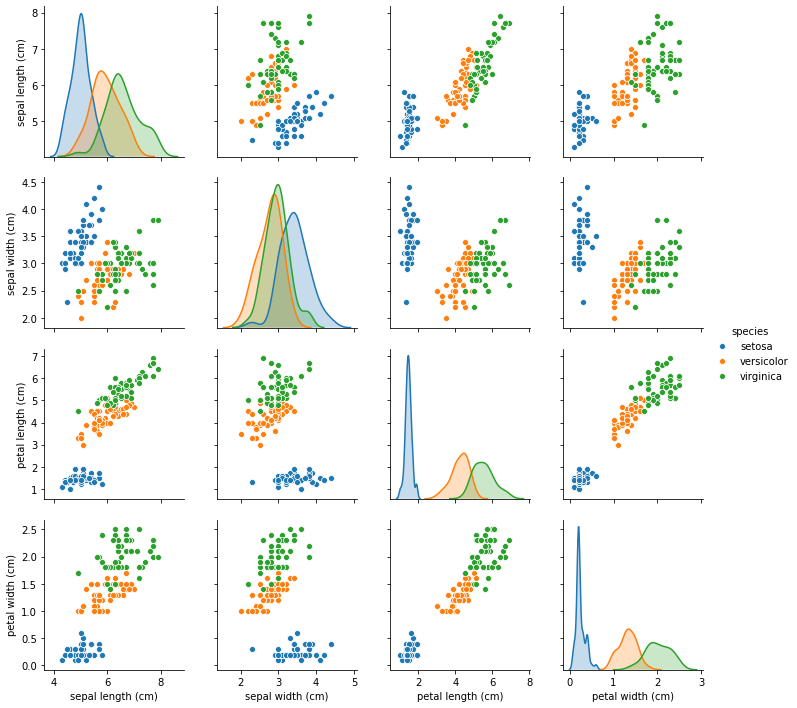

In [4]:
# Ta sekcja jest tylko na potrzeby zobrazowania zbioru danych

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# wykresy będą tworzone przy pomocy pakietu seaborn
import seaborn as sns

# konwersja na obiekt pandas.DataFrame
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# funkcja która nam zamieni wartości 0, 1, 2 na pełny opis tekstowy dla gatunku
targets = map(lambda x: iris['target_names'][x], iris['target'] )

# doklejenie informacji o gatunku do reszty dataframe
iris_df['species'] = np.array(list(targets))

# wykres
sns.pairplot(iris_df, hue='species')
plt.show()

In [0]:
# zobaczmy jak naocznie wyglądają dane
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Podzielmy zbiór na cechy oraz etykiety
# Konwencja, często spotykana w dokumentacji sklearn to X dla cech oraz y dla etykiet
X = iris.data
y = iris.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator k-NN używając parametru 5 sąsiadów
knn = KNeighborsClassifier(n_neighbors = 5)

# Uczymy klasyfikator na zbiorze - zaskoczenie - uczącym
knn.fit(X_train, y_train)

# Przewidujemy wartości dla zbioru testowego
y_pred = knn.predict(X_test)

# Sprawdzamy kilka pierwszych wartości przewidzianych
print(y_pred[:5])

# Sprawdzamy dokładność klasyfikatora
print(knn.score(X_test, y_test))

[0 0 2 0 1]
1.0


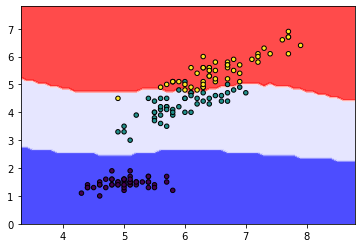

In [6]:
# Na przykładzie dwóch cech sprawdźmy jakie są granice decyzyjne

%matplotlib inline

# Tworzymy płaszczyznę wszystkich możliwych wartości dla cechy 0 oraz 2, z krokiem 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Uczymy klasyfikator na tylko dwóch wybranych cechach
knn.fit(X_train[:, [0, 2]], y_train)

# Przewidujemy każdy punkt na płaszczyźnie
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tworzymy contourplot
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.bwr)
plt.scatter(X[:, 0], X[:, 2], c=y, s=20, edgecolor='k')
plt.show()

[1 1 2 1 0]
[0.9555555555555556, 1.0, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9777777777777777]


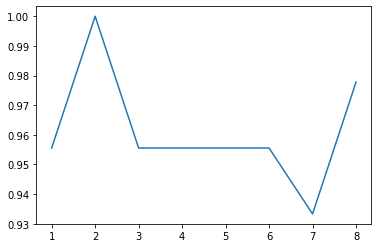

In [22]:
# Zadanie 2:
# Stwórz listę kilku wybranych przez siebie wartości dla parametru n_neighbors
# W pętli 'for' użyj kolejnych wartości parametru do stworzenia klasyfikatora
# Następnie naucz go na danych uczących
# Zapisz wynik scoringu na danych testowych do osobnej listy

lista_n = [1, 2, 3, 4, 5, 6, 7, 8]
dokladnosci = []

for n_neighb in lista_n:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    knn = KNeighborsClassifier(n_neighb)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    dokladnosc = knn.score(X_test, y_test)
    dokladnosci.append(dokladnosc)

# Wyświetl wykres zależności między liczbą sąsiadów a dokładnością.

%matplotlib inline
print(y_pred[:5])
print(dokladnosci)
plt.plot(lista_n, dokladnosci)
plt.show()

In [0]:
# Część 2

Elementy zbioru:  ['data', 'target', 'target_names', 'images', 'DESCR']
Typ pierwszego elementu z 'images':  <class 'numpy.ndarray'>
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Pierwsza cyfra w zbiorze to:  0


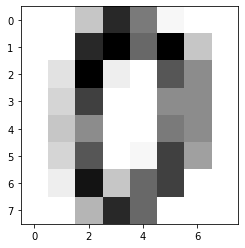

In [23]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# Wczytaj przykładowy zbiór danych - cyfry odręczne z MNIST
digits = datasets.load_digits()

# Zobaczmy jakie dane mamy w zbiorze
print('Elementy zbioru: ', list(digits.keys()))

# Każda cyfra to po prostu macierz 8x8
print('Typ pierwszego elementu z \'images\': ', type(digits['images'][0]))
print(digits['images'][0])

# Cyfry mają swoje etykiety
print('Pierwsza cyfra w zbiorze to: ', digits['target'][0])

# Możemy też wyświetlić dwuwymiarową macierz jako obrazek, za pomocą imshow
plt.imshow(digits.images[0], cmap=plt.cm.Greys)
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Podzielmy zbiór na cechy oraz etykiety
# Trzymamy się konwencji, X dla cech oraz y dla etykiet
X = digits.data
y = digits.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator k-NN używając parametru 5 sąsiadów
knn = KNeighborsClassifier(n_neighbors = 5)

# Uczymy klasyfikator na zbiorze uczącym
knn.fit(X_train, y_train)

# Sprawdzamy dokładność klasyfikatora
print(knn.score(X_test, y_test))

0.9888888888888889


In [25]:
# Sprawdźmy coś więcej niż dokładność
# na początek zapiszmy wyniki predykcji

y_pred = knn.predict(X_test)

# Sprawdźmy wyniki klasyfikacji
print(y_pred)

[0 3 5 9 5 1 4 5 2 7 9 7 6 2 7 6 1 7 1 3 0 2 8 6 8 8 2 9 3 4 2 9 5 9 3 0 5
 7 7 6 1 4 9 6 0 1 7 0 1 5 1 6 6 9 9 8 3 1 5 0 4 9 0 5 8 8 3 7 0 6 6 0 6 7
 1 8 1 8 3 4 5 0 8 4 3 2 6 2 7 1 1 2 9 7 1 8 1 7 1 7 7 1 1 1 5 0 4 4 5 9 1
 2 7 6 1 4 5 4 2 1 7 6 7 8 3 6 6 7 6 1 5 7 6 7 7 9 6 5 0 4 8 6 2 4 7 5 4 5
 3 8 3 2 4 2 7 2 3 4 7 4 0 3 5 7 2 1 5 0 7 3 1 9 4 6 7 7 4 8 3 5 1 4 7 2 7
 2 8 8 0 6 2 8 3 4 1 8 9 6 8 0 1 2 6 5 3 7 7 4 7 0 2 4 7 7 1 4 6 5 0 6 2 6
 8 7 8 4 7 3 9 9 3 4 4 2 2 4 9 8 7 8 9 9 7 7 4 8 5 7 6 3 5 3 5 4 3 6 5 5 1
 7 4 6 1 8 0 0 3 8 5 1 7 0 6 2 6 8 0 5 7 9 1 1 5 9 7 8 0 4 8 5 0 5 6 8 3 0
 0 9 9 4 6 8 4 7 2 8 4 0 5 1 6 3 0 7 6 8 5 0 9 4 7 9 3 5 2 9 6 2 2 9 7 9 5
 3 6 3 4 8 5 4 9 9 4 4 9 8 5 2 2 6 9 1 5 7 5 2 6 4 8 3 6 0 0 5 5 7 9 3 2 4
 1 5 1 9 1 3 2 7 6 4 2 4 8 4 2 1 3 0 7 9 2 1 3 2 1 9 1 2 4 4 8 3 9 5 1 5 8
 4 0 3 3 8 0 2 3 4 2 3 2 6 0 7 0 9 3 4 5 8 4 8 0 4 7 2 0 1 2 5 0 6 5 0 6 0
 0 0 1 8 5 5 1 6 5 0 2 0 1 7 1 8 1 9 8 4 8 0 0 9 9 5 2 2 3 3 3 6 0 4 0 2 3
 1 2 2 2 1 4 1 4 7 7 8 4 

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Jak bardzo wyniki różnią się od prawdziwych wartości?

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56  0  0  0  0  0  0  0  0  0]
 [ 0 55  0  0  0  0  0  0  0  0]
 [ 0  0 51  0  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  1  0  1]
 [ 0  0  0  0 61  0  0  0  0  0]
 [ 0  0  0  0  0 53  0  0  0  0]
 [ 0  0  0  0  0  0 50  0  1  0]
 [ 0  0  0  0  0  0  0 61  0  0]
 [ 0  1  0  1  0  0  0  0 54  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.98      1.00      0.99        55
           2       1.00      1.00      1.00        51
           3       0.98      0.96      0.97        49
           4       1.00      1.00      1.00        61
           5       0.98      1.00      0.99        53
           6       1.00      0.98      0.99        51
           7       0.98      1.00      0.99        61
           8       0.98      0.96      0.97        56
           9       0.98      0.98      0.98        47

    accuracy                           0.99       540
   macro avg       

In [0]:
# Opisy różnych metryk znajdziesz tutaj:
# https://en.wikipedia.org/wiki/Confusion_matrix
# Od biedy:
# https://pl.wikipedia.org/wiki/Tablica_pomyłek

In [27]:
# Klasyfikatory potrafią określać również prawdopodobieństwo przynależności do konkretnej klasy

y_pred_proba = knn.predict_proba(X_test)

# Sprawdźmy wyniki klasyfikacji dla kilku pierwszych wartości
print(y_pred_proba[:10])

[[1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.4 0.  0.  0.2 0.  0.2 0.2]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]]


In [0]:
# Część 3

In [0]:
# Zadanie 3:
# wczytaj dane o winach za pomocą funkcji poniżej
from sklearn.datasets import load_wine

# Zbadaj zbiór danych. Stwórz wykresy obrazujące ten zbiór danych.
# Podziel zbiór danych na uczący i testowy.
# Wytrenuj klasyfikator kNN
# Dokonaj predykcji na zbiorze testowym
# Wypisz raport z uczenia: confusion_matrix oraz classification_report

In [0]:
# Zadanie bonus:
# Wczytaj dane za pomocą funkcji fetch_openml
from sklearn.datasets import fetch_openml
# Funkcja przyjmuje jako parametr nazwę zbioru danych z https://www.openml.org/search?type=data
# Proponuję zbiór 'bank-marketing', ale możesz wybrać dowolny inny z kategorii "klasyfikacja"
# Reszta: jak w zadaniu 3.


In [0]:
#Zadanie 1:
#Zbiór danych zawiera pomiary długości i szerokości kelicha kolejnych kwiatów oraz dłogość i szerokość płatków kolejnych kwiatów
#Na tej podstawię możemy dokonać klasyfikacji konkretnych kwiatów do konkretnych gatunków

[6 5 2 1 3]
[0.9888888888888889, 0.9851851851851852, 0.9888888888888889, 0.987037037037037, 0.9777777777777777, 0.987037037037037, 0.9796296296296296, 0.9777777777777777]


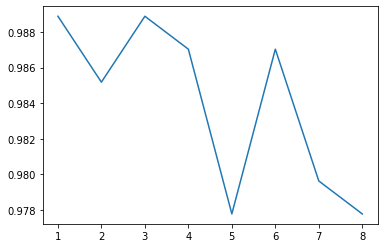

In [31]:
# Zadanie 2:

lista_n = [1, 2, 3, 4, 5, 6, 7, 8]
dokladnosci = []

for n_neighb in lista_n:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    knn = KNeighborsClassifier(n_neighb)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    dokladnosc = knn.score(X_test, y_test)
    dokladnosci.append(dokladnosc)

# Wyświetl wykres zależności między liczbą sąsiadów a dokładnością.

%matplotlib inline
print(y_pred[:5])
print(dokladnosci)
plt.plot(lista_n, dokladnosci)
plt.show()

In [40]:
#Zadanie 3:
from sklearn.datasets import load_wine
wine = datasets.load_wine()
print('Elementy zbioru: ', list(wine.keys()))
print('Etykiety: ', wine['target_names'])
print('Cechy: ', wine['feature_names'])
print('6 pierwszych danych elementów:')
print(wine['data'][0:5])

Elementy zbioru:  ['data', 'target', 'target_names', 'DESCR', 'feature_names']
Etykiety:  ['class_0' 'class_1' 'class_2']
Cechy:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
6 pierwszych danych elementów:
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820

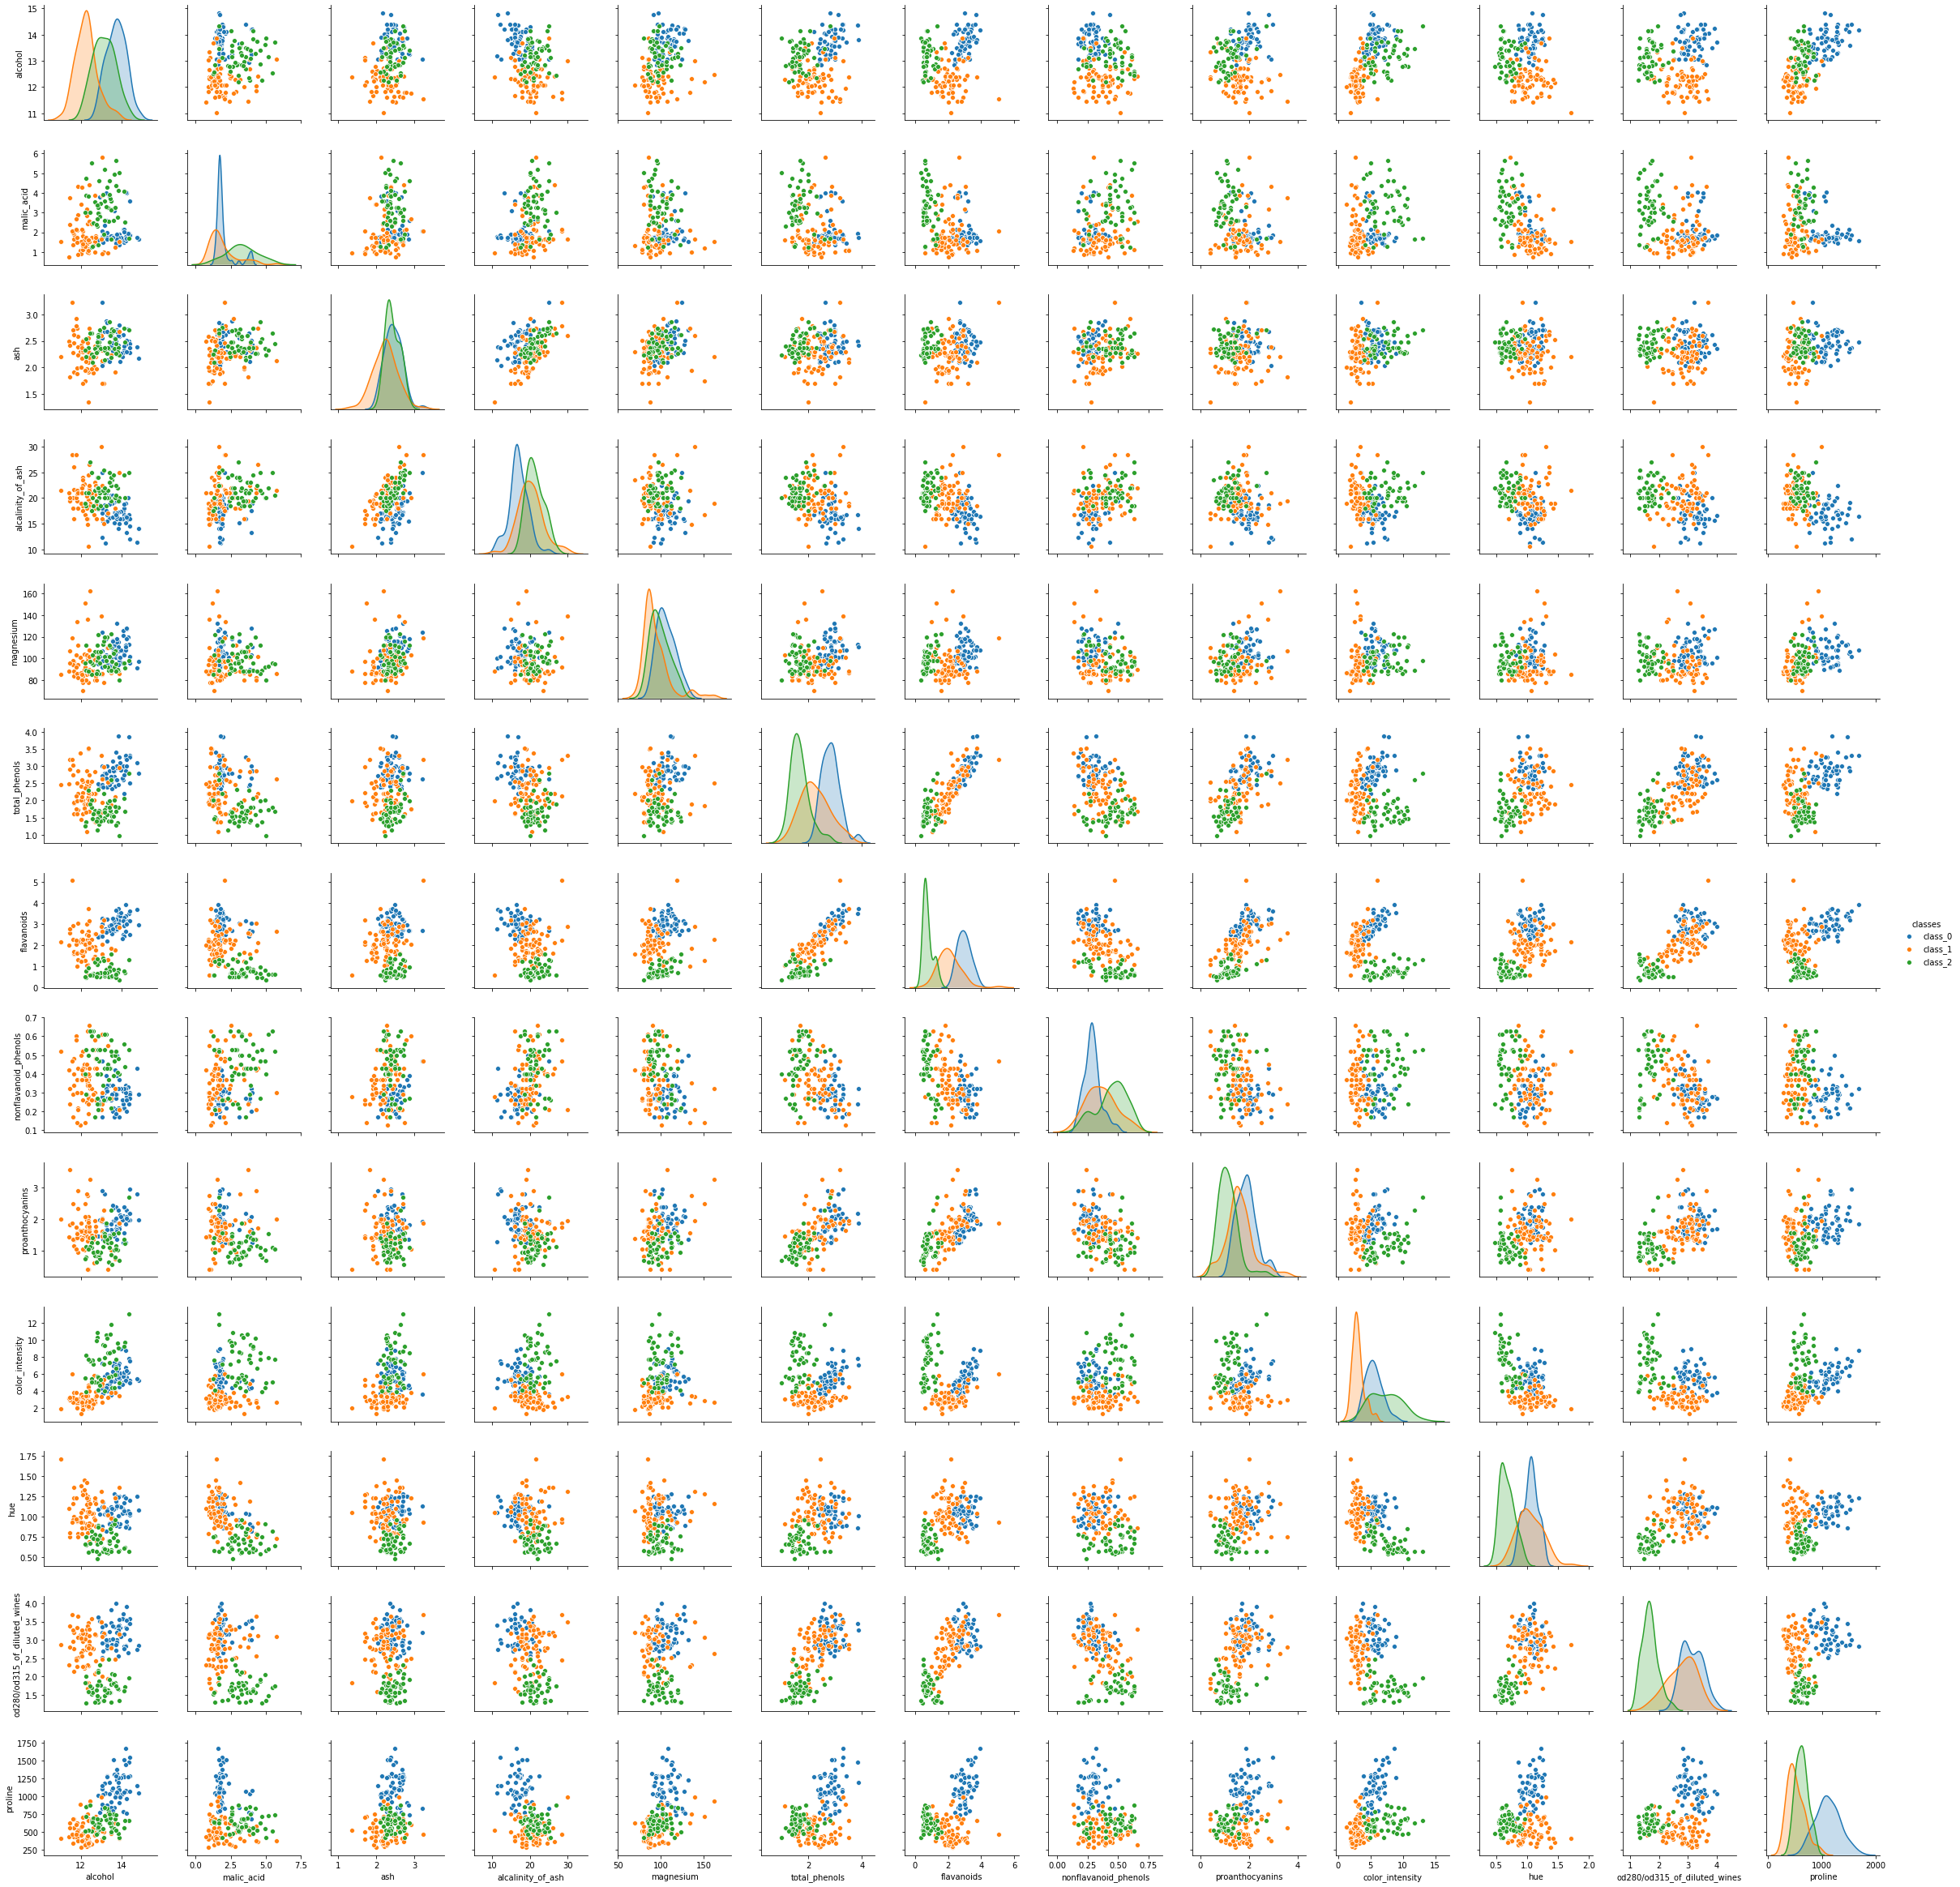

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

wine_df = pd.DataFrame(wine['data'], columns=wine['feature_names'])
targets = map(lambda x: wine['target_names'][x], wine['target'] )
wine_df['classes'] = np.array(list(targets))
sns.pairplot(wine_df, hue='classes')
plt.show()

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred[:5])
print(knn.score(X_test, y_test))


[1 0 1 1 1]
0.7222222222222222


In [63]:
y_pred = knn.predict(X_test)
print(y_pred)

[1 0 1 1 1 0 0 1 1 2 0 0 1 1 1 0 0 1 2 1 0 1 2 1 0 0 2 0 0 0 2 1 1 0 1 0 2
 1 1 1 2 0 1 1 2 2 2 0 1 1 0 1 2 1]


In [64]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[14  0  0]
 [ 1 19  5]
 [ 3  6  6]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        14
           1       0.76      0.76      0.76        25
           2       0.55      0.40      0.46        15

    accuracy                           0.72        54
   macro avg       0.69      0.72      0.70        54
weighted avg       0.71      0.72      0.71        54



In [65]:
y_pred_proba = knn.predict_proba(X_test)
print(y_pred_proba[:10])

[[0.  1.  0. ]
 [1.  0.  0. ]
 [0.  0.8 0.2]
 [0.  1.  0. ]
 [0.  0.6 0.4]
 [0.4 0.4 0.2]
 [0.4 0.4 0.2]
 [0.  1.  0. ]
 [0.  0.8 0.2]
 [0.  0.2 0.8]]
